In [41]:
import pandas as pd 

In [69]:
df = pd.read_csv("RecommendationDataSetFinal1.csv")
df.head()

,Seed_ID,Plant_Category,Seed_Name,Soil_Types,Best_Growing_Areas,Season,Temperature,Soil_Temperature,Precipitation,Precip,Soil_Moisture,Sunshine_Duration,Humid
0,67300,Herbaceous perennial,Monarde citron,"[""Loam"",""Sandy loam"",""Clay loam""]","[""North America"",""Europe"",""Asia""]","[""Summer"",""Spring""]",22.5,18.0,3.5,3.5,0.25,30000.0,70.0
1,67301,Flowering Plant,Montana Jack,"[""Loam"",""Sandy Loam"",""Clay Loam""]","[""Temperate Regions"",""Mountainous Areas""]","[""Spring"",""Summer""]",18.0,15.0,10.0,10.0,0.30,960.0,60.0
2,67302,Flower,Moravsky Div,"[""Loam"",""Sandy Loam""]","[""Central Europe"",""Eastern Europe""]","[""Summer"",""Autumn""]",22.0,18.0,5.0,5.0,0.30,18000.0,60.0
3,67303,Flowering Plant,Morden Early,"[""Loam"",""Clay"",""Sandy""]","[""Temperate regions"",""Mild climates""]","[""Spring"",""Summer""]",22.0,18.0,5.0,5.0,0.30,300.0,60.0
4,67304,Tomato,Mortgage Lifter,"[""Loam"",""Sandy Loam"",""Clay Loam""]","[""California"",""Florida"",""Texas""]","[""Spring"",""Summer"",""Autumn""]",18.0,22.0,5.0,5.0,0.30,3000.0,70.0


In [70]:
df.columns

Index(['Seed_ID', 'Plant_Category', 'Seed_Name', 'Soil_Types',
       'Best_Growing_Areas', 'Season', 'Temperature', 'Soil_Temperature',
       'Precipitation', 'Precip', 'Soil_Moisture', 'Sunshine_Duration',
       'Humid'],
      dtype='object')

In [71]:
X=df[['Humid','Temperature','Soil_Moisture','Soil_Temperature','Precipitation']]
X

,Humid,Temperature,Soil_Moisture,Soil_Temperature,Precipitation
0,70.0,22.5,0.25,18.0,3.5
1,60.0,18.0,0.30,15.0,10.0
2,60.0,22.0,0.30,18.0,5.0
3,60.0,22.0,0.30,18.0,5.0
4,70.0,18.0,0.30,22.0,5.0
...,...,...,...,...,...
8124,60.0,22.5,0.25,18.3,5.7
8125,50.0,20.0,0.30,15.0,5.0
8126,65.0,22.5,0.25,20.0,5.0
8127,60.0,20.0,0.30,18.0,5.0


In [72]:
y = df[["Seed_Name"]]
y

,Seed_Name
0,Monarde citron
1,Montana Jack
2,Moravsky Div
3,Morden Early
4,Mortgage Lifter
...,...
8124,Miss Jekyll White
8125,Mission Bells
8126,Mission Dike
8127,Moldovan Green


In [73]:
for column in X.columns:

    X[column].fillna(X[column].mean(),inplace = True)

print(X.info())
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Humid             8129 non-null   float64
 1   Temperature       8129 non-null   float64
 2   Soil_Moisture     8129 non-null   float64
 3   Soil_Temperature  8129 non-null   float64
 4   Precipitation     8129 non-null   float64
dtypes: float64(5)
memory usage: 317.7 KB
None


C:\Users\PMLS\AppData\Local\Temp\ipykernel_11048\1978891038.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(X[column].mean(),inplace = True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_11048\1978891038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column].fillna(X[column].mean(),inplace = True)


,Humid,Temperature,Soil_Moisture,Soil_Temperature,Precipitation
0,70.0,22.5,0.25,18.0,3.5
1,60.0,18.0,0.30,15.0,10.0
2,60.0,22.0,0.30,18.0,5.0
3,60.0,22.0,0.30,18.0,5.0
4,70.0,18.0,0.30,22.0,5.0
...,...,...,...,...,...
8124,60.0,22.5,0.25,18.3,5.7
8125,50.0,20.0,0.30,15.0,5.0
8126,65.0,22.5,0.25,20.0,5.0
8127,60.0,20.0,0.30,18.0,5.0


OPTIMAL SOLHUTE SCORE AND K VALUE :  39     40


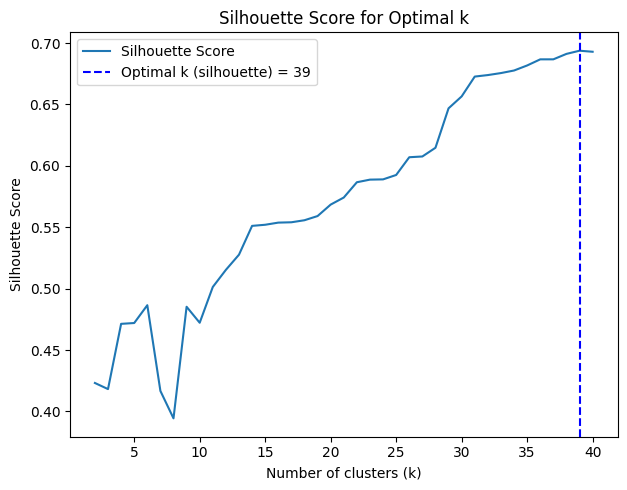

The optimal number of clusters (silhouette score) is: 39


In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


# List to store WCSS and Silhouette scores for each k
wcss = []
silhouette_scores = []
kmns = []
# Loop through different values of k (number of clusters)
for k in range(2, 41):  # Start from k=2 as silhouette score doesn't work for k=1
    km = KMeans(n_clusters=k, random_state=42)
    kmns.append(km)
    cluster_labels = km.fit_predict(X)
    # Append the WCSS (Inertia)
    wcss.append(km.inertia_)
    
    # Calculate silhouette score for current clustering
    sil_score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(sil_score)

# Find the optimal k based on the silhouette score (maximizing silhouette score)
optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # +2 to match index (since we started from k=2)

print("OPTIMAL SOLHUTE SCORE AND K VALUE : ",optimal_k_silhouette  ,"   ",k  )

plt.figure(figsize=(12, 5))
# Plot for Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 41), silhouette_scores, label='Silhouette Score')
plt.axvline(x=optimal_k_silhouette, color='blue', linestyle='--', label=f'Optimal k (silhouette) = {optimal_k_silhouette}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.legend()

plt.tight_layout()
plt.show()
print(f"The optimal number of clusters (silhouette score) is: {optimal_k_silhouette}")


In [77]:
len(kmns)

39

In [79]:
import pickle


with open('KMean.csv','wb') as file:

    pickle.dump(kmns[optimal_k_silhouette-1],file)



In [86]:
model  = kmns[optimal_k_silhouette-1]
labels = model.fit_predict(X)
labels = list(labels)

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = df.copy()

# Add the labels as a new column to the DataFrame copy
X_copy['Cluster'] = labels

# Save the DataFrame with cluster labels to a CSV file
X_copy.to_csv('cluster_labels.csv', index=False)

In [89]:
km=KMeans(n_clusters=25,random_state=15)
preds = km.fit_predict(X)

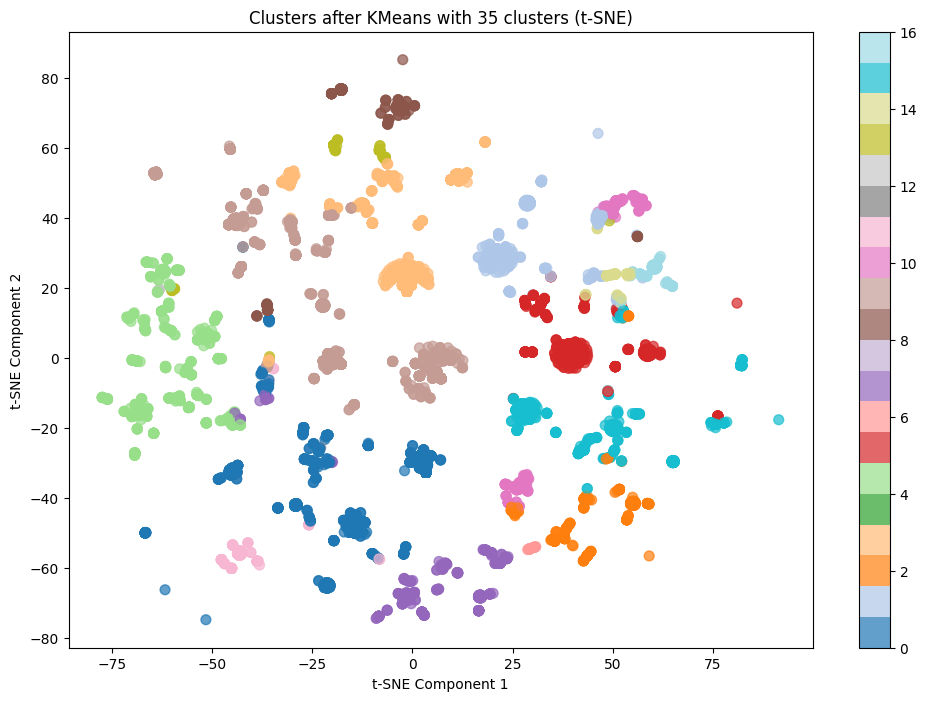

In [10]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=preds, cmap='tab20', s=50, alpha=0.7)
plt.colorbar()
plt.title('Clusters after KMeans with 35 clusters (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [90]:
from sklearn.metrics import silhouette_score
# The silhouette score ranges from -1 to 1, where higher values indicate better cluster separatio
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, preds)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.7790492453678063


In [28]:
# Inertia from KMeans
print(f'Inertia: {km.inertia_}')


Inertia: 46969.51293396204


In [29]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(X, preds)
print(f'Davies-Bouldin Index: {db_score}')


Davies-Bouldin Index: 0.7271749711284207


In [30]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X, preds)
print(f'Calinski-Harabasz Index: {ch_score}')


Calinski-Harabasz Index: 5077.127162280514


In [31]:
import numpy as np

# Count the number of points in each cluster
cluster_sizes = np.bincount(preds)
print(f'Cluster Sizes: {cluster_sizes}')


Cluster Sizes: [ 235  609 1676  328  533  396 1424   22 1157   68  452  568  131  233
  177  116    4]


In [24]:
new_data = X[10:11]  
predicted_cluster = km.predict(new_data)
print(f"The new data point belongs to cluster {predicted_cluster[0]}")

The new data point belongs to cluster 6


In [25]:
df['Cluster'] = km.labels_
# Filter seeds in the predicted cluster

seeds_in_cluster = df[df['Cluster'] == predicted_cluster[0]]['Seed_Name'].tolist()

print(f"Seeds in this cluster: {seeds_in_cluster}")

Seeds in this cluster: ['Moskvich', 'Mrihani', 'Muscat', 'Napoletano', 'Nopode de Berlandier', 'Old Mexico', 'Opsis des teinturiers', 'Orange Bourgois', 'Orange Centiflor', 'Oriole', 'Osaka Purple', 'Pal', 'Pantos', 'Pepperoncini', 'Persian Jewels Mix', 'Peshawar', 'Petites Feuilles', 'Petits Becs', 'Petrowski Early Round Yellow', 'Pink Berkeley Tie Dye', 'Precocibec', 'Primary Colors', 'Principe Borghese', 'Prune Noire', 'Purple Ball', 'Red Centiflor Cherry', 'Red Fig', 'Red Warty Thing', 'Redcrest', 'Reif Red', 'Rheinau Gold', 'Ring of Fire', 'Rio Grande', 'Rocky Ford Green Flesh', 'Roi Humbert', 'Roma Paste', 'Rosso Duemila', 'Rosso Sicilian', 'Rouge', 'Round Mauve', 'Ruvien', 'S Early Orange', 'S Paste', 'Sandul Moldovan', 'Santa Rainier', 'Sensation', 'Shintokiwa', 'Silk Leaf', 'Slim Jim', 'Small Sugar', 'Sol Gold', 'Soraya', 'Sparkler Marigold', 'Speckled Apple', 'Speckled Roman', 'Stocky Golden Roaster', 'Submarine Blush Cherry', 'Sugar Baby', 'Summer Cider Apricot', 'Suptol', '

In [50]:
len(seeds_in_cluster)

382